# "DH 140: Final Project"
> "Awesome summary"

- toc:true
- branch: master
- badges: true
- comments: true
- author: Hamel Husain & Jeremy Howard
- categories: [fastpages, jupyter]

<br><b>Name<b>: Jack Witherspoon
<br><b>Class<b>: Digital Humanities 140
<br><b>Term<b>: Winter 2022
<br><b>Professor<b>: Ben Winjum


<h1>Project Title: Eastern State Penitentiary Analysis<h1>

<h3>Introduction:<h3>

In this notebook I will look to explore the "Prisoner records from the Eastern State Penitentiary" data set. This data set records the admissions of prisoners number 20 through 1124, including name, crime, sentence, place of origin, race/ethnicity, time in and time out, and comments on moral and educational conditions. In particular I would like to focus on the relationships between a prisoner's ability to read and write and the characteristics of their imprisonment. Since this data set does not provide the education level of each prisoner I am using the prisoners ability to read and write as a proxy for at least some level of education. 

Another thing to note is that these prisoner records looked to have been transferred from another format, so many of the data points are incomplete or hard to analyze. These include things like combined columns, improper formatting, and missing information. Specifically there was one column that combined ethnicity, religion and occupation. In addition to the column having multiple data points combined into one there was also a significant amount missing for the ethnicity portion and much of the data was inconsistently ordered within the column. 

<h3>Background:<h3> 


The Eastern State Penitentiary, also known as ESP, is a former American prison in Philadelphia, Pennsylvania. It is located at 2027 Fairmount Avenue between Corinthian Avenue and North 22nd Street in the Fairmount section of the city, and was operational from 1829 until 1971. The penitentiary refined the revolutionary system of separate incarceration first pioneered at the Walnut Street Jail which emphasized principles of reform rather than punishment.

Notorious criminals such as Al Capone and bank robber Willie Sutton were held inside its innovative wagon wheel design. James Bruno (Big Joe) and several male relatives were incarcerated here between 1936 and 1948 for the alleged murders in the Kelayres massacre of 1934, before they were paroled. At its completion, the building was the largest and most expensive public structure ever erected in the United States, and quickly became a model for more than 300 prisons worldwide.

<h3>Data Cleaning:<h3> 

The data set I am working with for this project is  "Prisoner records from the Eastern State Penitentiary". Upon working with this data it became clear that this had been transferred over from another format to CSV as the data appeared very messy. For example there was a conjoined column of ethnicity, occupation and religion where much of the data in that column was out of order or missing. This was a similar case for the “Column Notes” where much of the data was conjoined together. To solve this problem prior to uploading the data to Jupyter Notebooks I delimited the respective columns in Excel and filtered for the blank values to fill them in with a “N/A” value. There was excess data in the “Column Notes” when I delimited the column that I did not have any use for so I removed that data from the file. In addition, there was also some misspelling in the “Offense” column that I corrected and to consolidate the different data types. Lastly, there were two other text heavy columns; “Notes” and “Discharge Notes” that I did not end up using in my analysis so did not delimit or clean in any way. Once the data cleaning was complete I converted the xlsx file to a csv file to upload to jupyter notebooks.

<h3>Questions:<h3>



1. What does the typical prisoner at Eastern State Penitentiary look like?

2. What effect does education have on the length of a prisoner's sentence?

3. What relationship does the number of convictions have on the prisoner's length of sentence?




<h3>Summary Statistics and Exploratory Data Visualizations:<h3>

In [1]:
#Importing Libraries

import pandas as pd
import csv
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.preprocessing import scale
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

In [2]:
#Importing Data

data = pd.read_csv('Eastern_State_Admissions_Book.csv')

data.head()

,FirstName,LastName,Age,Occupation,Ethnicity,Birthplace,PrisonerNumber,AdmissionDate,SentencingLocation,MainOffense,Sentencing,NumberConvictions,ReadWrite,AlcoholStatus,DischargeNote,Description
0,William,Clark,28.0,baker,NaN,Scotland,20.00,4/24/1830,NaN,Murder,12.0,NaN,Can Read or Write,NaN,Pardoned and discharged June 1840. Conduct uni...,Break Baker. Exceedingly rough and uncourteous...
1,Elijah,Collins,24.0,NaN,Black,NaN,31.00,8/17/1830,NaN,Burglary,10.0,NaN,Can Read or Write,sober,Discharged. Time out. Some hope,Cooks for the sick. Professes to be turned to ...
2,George,Wilson,30.0,NaN,NaN,NaN,56.00,10/25/1830,NaN,Robbery,NaN,4.0,Can Read or Write,NaN,"Discharged by pardon January 13, 1841",Seems perfectly satisfied that he has been a r...
3,Samiul,Dill,37.0,NaN,Black,Sussex Co. Delaware,323.00,11/21/1834,Montgomery Co.,Larceny,6.0,1.0,Can Read or Write,NaN,"Died July 7th, 1839 Died suddenly and without ...",Thinks he knows something of religion. Very lo...
4,Edward H.,Boyd,20.0,NaN,NaN,"Albany, New York",376.00,4/8/1835,Franklin Co.,Stealing,5.0,1.0,Can Read or Write,NaN,Discharged Time out,Young man of tolerably good mind and informati...


<b>Summary Statistics of the Three Numeric Variables in the data set: Age, Sentencing and Number of Convictions<b>

In [3]:
data.describe()

,Age,Sentencing,NumberConvictions
count,517.000000,517.000000,513.000000
mean,29.462282,4.386847,1.619883
std,9.458858,4.128421,0.967113
min,12.000000,1.000000,1.000000
25%,23.000000,2.000000,1.000000
50%,27.000000,3.000000,1.000000
75%,35.000000,5.000000,2.000000
max,71.000000,18.000000,6.000000


<b>Exploratory Data Visualization 1:<b>



This data visulization looks to explore the age of admissions to the Eastern State Prison

Text(0, 0.5, 'Frequency')

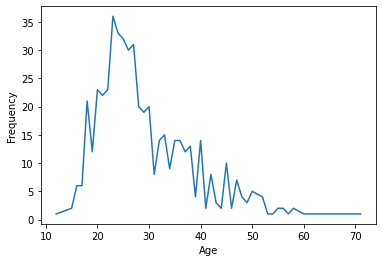

In [4]:
data.groupby('Age').size().plot()

plt.xlabel("Age")
plt.ylabel("Frequency")

<b>Exploratory Data Visualization 2:<b>

This data visulization looks to explore the freuqency of convictions.

Text(0, 0.5, 'Frequency')

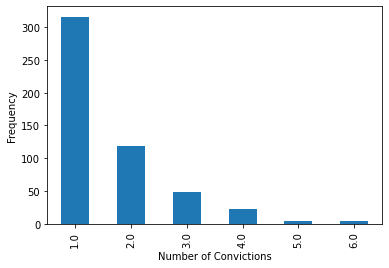

In [5]:
data.groupby('NumberConvictions').size().plot.bar()

plt.xlabel("Number of Convictions")
plt.ylabel("Frequency")

Exploratory Data Visualization 3:

This data visulization looks to explore the freuqency of offenses.

Text(0, 0.5, 'Frequency')

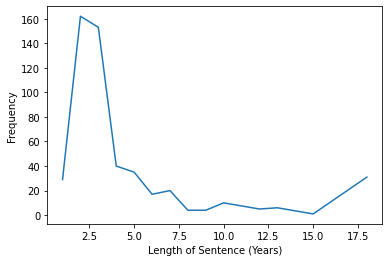

In [6]:
data.groupby('Sentencing').size().plot()

plt.xlabel("Length of Sentence (Years)")
plt.ylabel("Frequency")

Exploratory Data Visualization 4:

This data visulization looks to explore the freuqency of offenses.

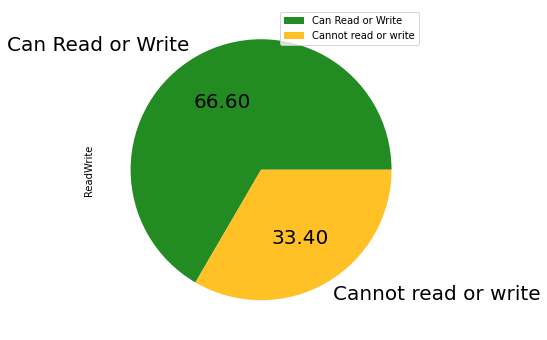

In [7]:
data['ReadWrite'].value_counts().plot.pie(

    colors=["#228B22", "#FFC125"],
    autopct="%.2f",
    fontsize=20,
    figsize=(6, 6),
);

plt.legend()

Exploratory Data Visualization 5:

This data visulization looks to explore the freuqency of offenses.

<AxesSubplot:>

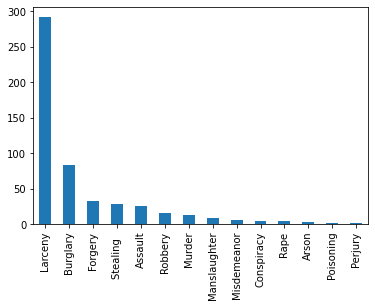

In [8]:
data['MainOffense'].value_counts().plot.bar()


Exploratory Data Visualization 6:

This data visulization looks to explore the freuqency of offenses.

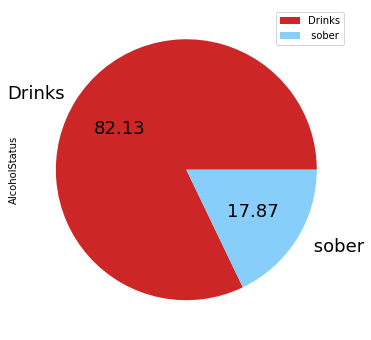

In [9]:
data['AlcoholStatus'].value_counts().plot.pie(

    colors=["#CD2626", "#87CEFA"],
    autopct="%.2f",
    fontsize=18,
    figsize=(6, 6),
);

plt.legend()

<b> Main Take Aways from Exploratory Data Visualizations:<b>

After exploring the data through some initial visualizations a few key things appeared. The first is that this population is very young. The second is that most of the prisoners here are being sentenced for Larceny with falling frequency of other crimes such as burglary, forgery, stealing and assault. In addition, it also becomes very clear that many of the prisoners sentenced have very little education with almost half lacking the ability to read or write. Lastly, it is also interesting to note that more than 3/4ths of the prisoners here drink alcohol in some capacity. During my analysis I would like to dig deeper to get more accurate means of some of these variables, and analyze to see if there is any relationship between a prisoner's ability to read and write other variables recorded in the data.

<h3>Data Analysis:<h3>

<b>Part 1: Comparing averages to get a better picture of what the average prisoner at Eastern State Penitentiary looks like <b>

In [10]:
# Average Sentence Length

avg_sent = data.Sentencing.mean()

print(avg_sent)


4.386847195357833


In [11]:
#Average Number of Convictions

avg_conv = data.NumberConvictions.mean()

print(avg_conv)

1.6198830409356726


In [12]:
#Average Number of Convictions

avg_age = data.Age.mean()
med_age = data.Age.median()

print(avg_age)
print(med_age)

29.46228239845261
27.0


In [13]:
#Average Sentence Length with Respect of the Prisoners Ablitity to Read and Write

data.groupby('ReadWrite')['Sentencing'].mean()

ReadWrite
Can Read or Write       4.023529
Cannot read or write    5.000000
Name: Sentencing, dtype: float64

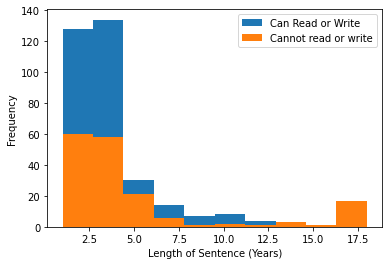

In [13]:
#Comparing Sentence Length Between the Prisoners ability to Read and Write

data.groupby('ReadWrite')['Sentencing'].plot.hist()

plt.xlabel("Length of Sentence (Years)")
plt.ylabel("Frequency")
plt.legend()

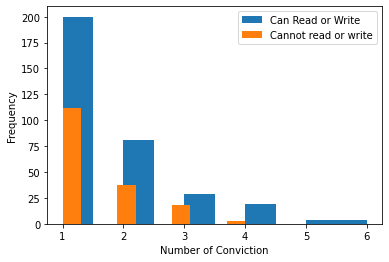

In [14]:
#Comparing Number of Covictions Between the Prisoners ability to Read and Write

data.groupby('ReadWrite')['NumberConvictions'].plot.hist()

plt.xlabel("Number of Conviction")
plt.ylabel("Frequency")
plt.legend()

<b>Results Summary<b>

Expanding on the exploratory data visualizations in the previous section I wanted to calculate the means of different characteristics to get a better picture of the average prisoner at Eastern State Penitentiary. Much of the result confirms suspicions I had from my initial parse through the data. With the average sentence length around 4.38 years, average number of convictions being around 1.6 and average age of a prisoner being around 29 years old. Interestingly the median age of prisoners was slightly lower at 27 years old. In addition, I also found that it seemed the longer prison sentences tended to be served by those who did not have the ability to read or write. In my proceeding analysis I would like to preform a statistical test to confirm these suspicions. 

<b>Part 2: Statistical Analysis Of a Prisoner's Ability to Read and Write Compared to Their Sentence Length<b>

In [15]:
#Getting Description of Data to Compare Sentence Length with Respect to a Prisoner's Ability to Read and Write

data.groupby('ReadWrite')['Sentencing'].describe()

,count,mean,std,min,25%,50%,75%,max
ReadWrite,,,,,,,,
Can Read or Write,340.0,4.023529,3.514744,1.0,2.0,3.0,4.0,18.0
Cannot read or write,170.0,5.000000,4.930283,1.0,2.0,3.0,5.0,18.0


<AxesSubplot:title={'center':'Sentencing'}, xlabel='ReadWrite'>

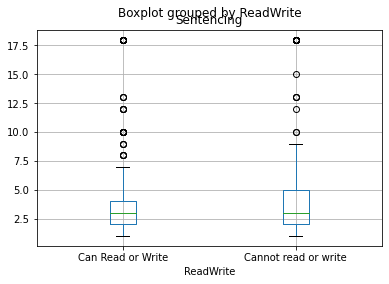

In [16]:
#Box Plot Comparing Sentence Length with Respect to a Prisoners Ability to Read and Write 

data.boxplot(column=['Sentencing'], by='ReadWrite')

In [23]:
#Getting rid of NaN values

##df = data[data['Sentencing'].notna()

df = data.dropna(subset = ['Sentencing'])



In [24]:
#Grouping Data by the Prisoner's Ability to Read and Write


sample_yes = df[(df['ReadWrite'] == 'Can Read or Write')]
sample_no = df[(df['ReadWrite'] == 'Cannot read or write')]




print(sample_yes.shape)
print(sample_no.shape)

(340, 16)
(170, 16)


Data count is not the same. To fix this I will trim the 'sample_no' to match 'sample_yes'.

In [27]:
#Trimming Data

sample_yes = sample_yes.sample(170)

print(sample_yes.shape)
print(sample_no.shape)

(170, 16)
(170, 16)


(array([14.,  4.,  4., 12., 41., 66., 19.,  5.,  1.,  4.]),
 array([-2.67331427, -2.11703486, -1.56075544, -1.00447602, -0.44819661,
         0.10808281,  0.66436223,  1.22064164,  1.77692106,  2.33320047,
         2.88947989]),
 <BarContainer object of 10 artists>)

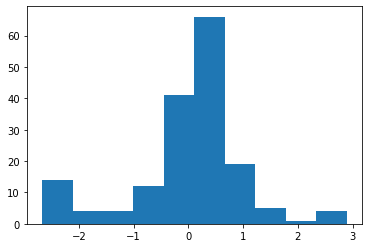

In [28]:
#Calculating and graphing residuals 
diff_res_read_sent = scale(np.array(sample_yes['Sentencing']) - np.array(sample_no['Sentencing']))
plt.hist(diff_res_read_sent)

This data does not look to be normally distributed. Will make QQ plot to further verify that data is not normally disrtibuted.

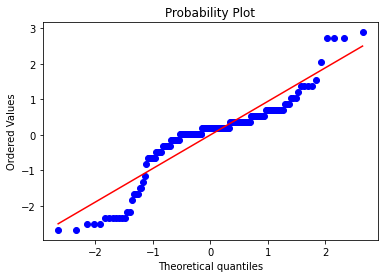

In [29]:
#QQ plot

stats.probplot(diff_res_read_sent, plot=plt, dist='norm');

Residuals look high. Most likely will not be statistically significant

In [45]:
#t-test

stats.levene(sample_yes['Sentencing'], sample_no['Sentencing'])

LeveneResult(statistic=1.6434934497816582, pvalue=0.2007254536539105)

 The p-value is high so we have to accept the null hypothesis. The means are not statistically different.

In [46]:
#Showing different Variances between groups
print(sample_yes.var())
print(sample_no.var())

Age                  95.558960
Sentencing           16.090811
NumberConvictions     1.050493
dtype: float64
Age                  86.729360
Sentencing           24.307692
NumberConvictions     0.560299
dtype: float64


/tmp/ipykernel_160/2963497352.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(sample_yes.var())
/tmp/ipykernel_160/2963497352.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(sample_no.var())


We can also verify the variances are different

<b>Results Summary<b>

In this section of my analysis I looked to analyze the relationship between a person's ability to read and write and the length of their sentence. I first did some initial analysis looking at the distribution of residuals. I did this by creating a histogram and QQ plot. Both these results showed the data to not be very normally distributed. One of the main reasons I believe this to be the case is that since a lot of the data was missing I had to filter it out in order to perform the t-test. If there was more data I think there would be a greater chance in the residuals showing a normal distribution. I still proceeded to perform a t-test and got a result that was not statistically significant. Showing that we cannot reject the null hypothesis that the ability to read and write has an effect on the length of the prison sentence. Given that previous data visualizations seem to potentially show such a relationship that came as a bit of a surprise.

<b>Part 3: Linear Regression<b>

In [55]:
mod = smf.ols(formula='Sentencing ~ NumberConvictions', data=df)

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             Sentencing   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     5.402
Date:                Fri, 11 Mar 2022   Prob (F-statistic):             0.0205
Time:                        03:12:48   Log-Likelihood:                -1440.9
No. Observations:                 511   AIC:                             2886.
Df Residuals:                     509   BIC:                             2894.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             5.0445      0.35

(array([ 12., 100., 255.,  62.,  26.,   9.,   7.,   9.,   1.,  30.]),
 array([-1.33677143, -0.87017976, -0.40358809,  0.06300357,  0.52959524,
         0.9961869 ,  1.46277857,  1.92937023,  2.3959619 ,  2.86255356,
         3.32914523]),
 <BarContainer object of 10 artists>)

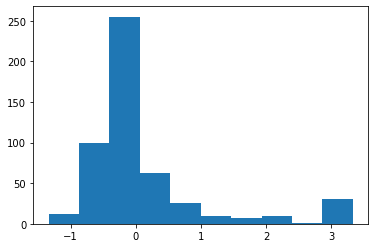

In [66]:
#Calculating and graphing residuals 
diff_res_sent_con = scale(np.array(data['Sentencing']) - np.array(data['NumberConvictions']))
plt.hist(diff_res_sent_con)

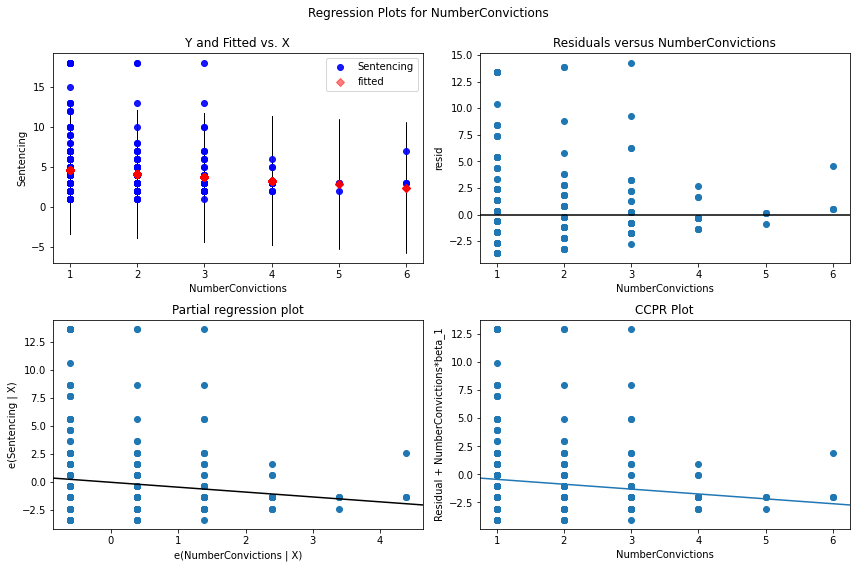

In [56]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'NumberConvictions', fig= fig)

<b>Results Summary:<b>

<b>Final Thoughts:<b>